Stock Price Analysis

Analyzing the risk of a stock
Predicting stock price using Monte Carlo method

1) What was the change in stock price over time?
2) What was the daily return of the stock on average
3) What was the moving average of the various stock?
4) What was thje corrlation between different stocks' closing price?
5) How much value do we put at risk by investing a stock?
6) How can we attempt to predict future stock behavior?


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#from pandas.io.data import DataReader
#import pandas_datareader as pdr
from pandas_datareader import data as pdr
from pandas_datareader import DataReader
from datetime import datetime
import fix_yahoo_finance as yf
yf.pdr_override()

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#baba =  pdr.get_data_yahoo('BABA', start, end)

In [5]:
#baba

In [6]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,161.791739,163.059328,160.537195,161.821028,160.756126,2.983264e+07
std,11.077497,11.242794,11.027130,11.091582,11.656916,1.230982e+07
min,141.220001,142.000000,140.449997,140.679993,138.489166,5.156469e+06
25%,153.729996,154.240005,152.630005,153.460007,151.901291,2.149320e+07
50%,160.289993,162.050003,159.070007,160.500000,159.245941,2.636850e+07
75%,172.479996,173.919998,171.259995,172.270004,171.610001,3.502630e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-04-18 to 2018-04-18
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int32
dtypes: float64(5), int32(1)
memory usage: 12.8 KB


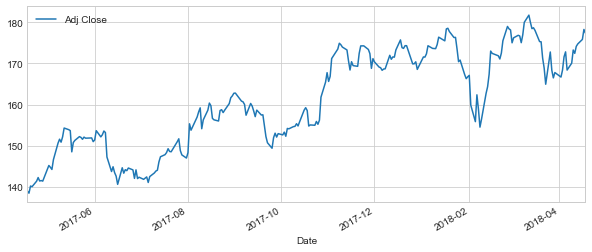

In [9]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

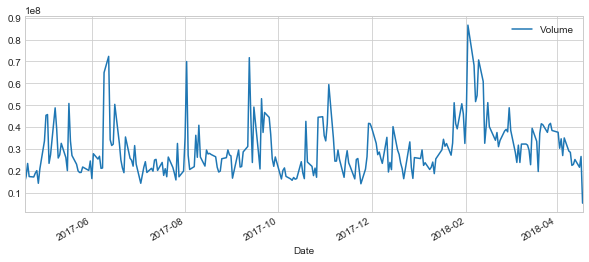

In [10]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma, center = False).mean()

In [12]:
AAPL.head(20)
#df['new_col'] = data['column'].rolling(5).mean()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2017-04-18,141.410004,142.039993,141.110001,141.199997,139.001068,14697500,NaN,NaN,NaN
2017-04-19,141.880005,142.000000,140.449997,140.679993,138.489166,17328400,NaN,NaN,NaN
2017-04-20,141.220001,142.919998,141.160004,142.440002,140.221771,23319600,NaN,NaN,NaN
2017-04-21,142.440002,142.679993,141.850006,142.270004,140.054413,17320900,NaN,NaN,NaN
2017-04-24,143.500000,143.949997,143.179993,143.639999,141.403061,17134300,NaN,NaN,NaN
2017-04-25,143.910004,144.899994,143.869995,144.529999,142.279205,18871500,NaN,NaN,NaN
2017-04-26,144.470001,144.600006,143.380005,143.679993,141.442444,20041200,NaN,NaN,NaN
2017-04-27,143.919998,144.160004,143.309998,143.789993,141.550735,14246300,NaN,NaN,NaN
2017-04-28,144.089996,144.300003,143.270004,143.649994,141.412918,20860400,NaN,NaN,NaN


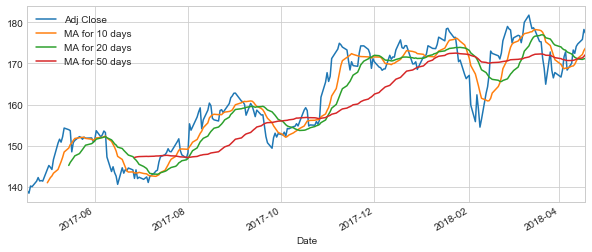

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4))

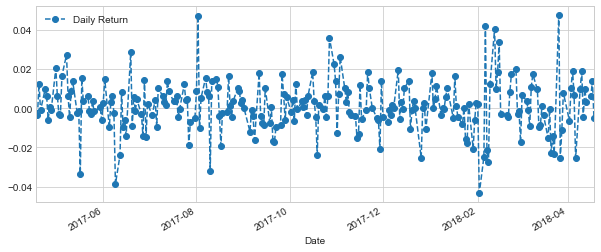

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

In [15]:
#dr = DataFrame(AAPL['Daily Return'].dropna(), columns = ['Date', 'DR'])
#dr = dr[:]
dr = AAPL['Daily Return'].dropna()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


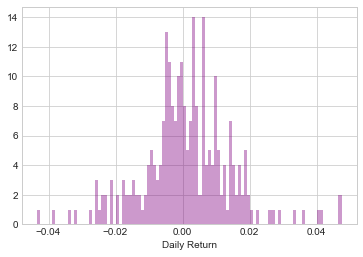

In [16]:
sns.distplot(dr, kde = False, bins = 100, color = 'purple')

In [17]:
closing_df = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 downloaded


In [18]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-04-18,139.001068,903.780029,836.820007,64.048721
2017-04-19,138.489166,899.200012,838.210022,63.705902
2017-04-20,140.221771,902.059998,841.650024,64.156464
2017-04-21,140.054413,898.530029,843.190002,65.038002
2017-04-24,141.403061,907.409973,862.760010,66.144821


In [19]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-04-18,NaN,NaN,NaN,NaN
2017-04-19,-0.003683,-0.005068,0.001661,-0.005352
2017-04-20,0.012511,0.003181,0.004104,0.007073
2017-04-21,-0.001194,-0.003913,0.001830,0.013740
2017-04-24,0.009629,0.009883,0.023209,0.017018


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


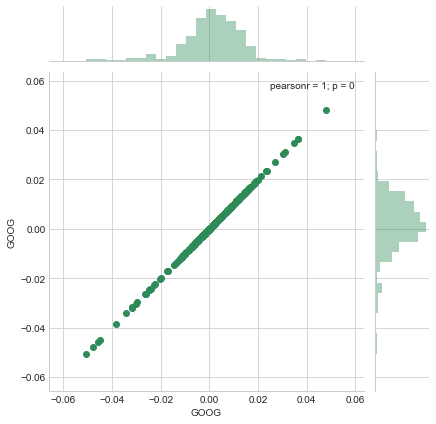

In [20]:
sns.jointplot('GOOG','GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


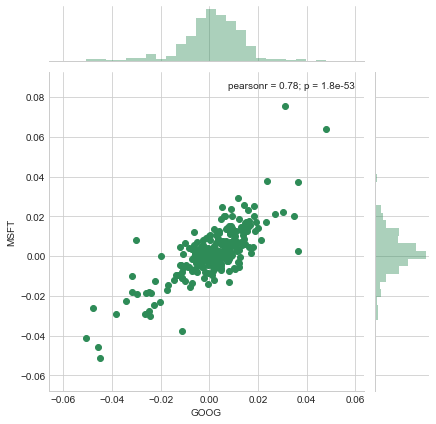

In [21]:
sns.jointplot('GOOG','MSFT', tech_rets, kind = 'scatter', color = 'seagreen')

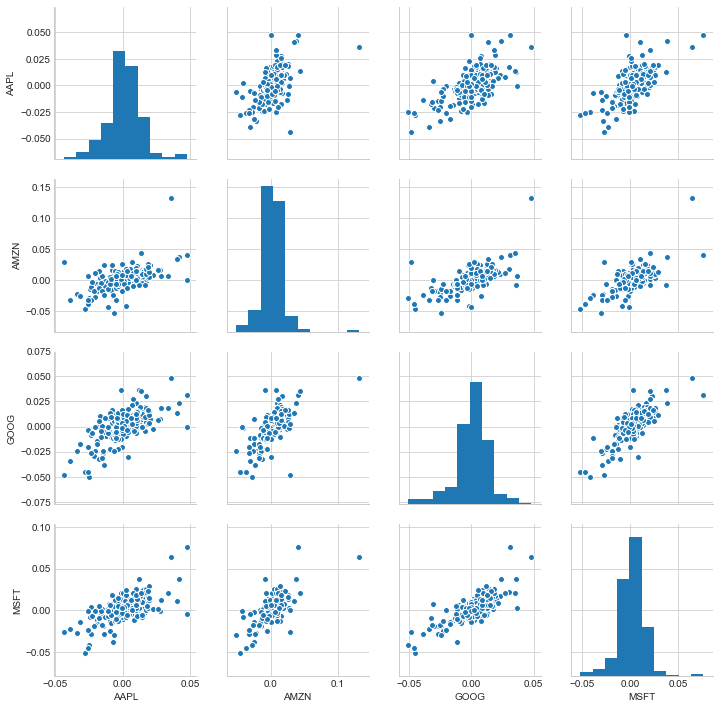

In [22]:
sns.pairplot(tech_rets.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


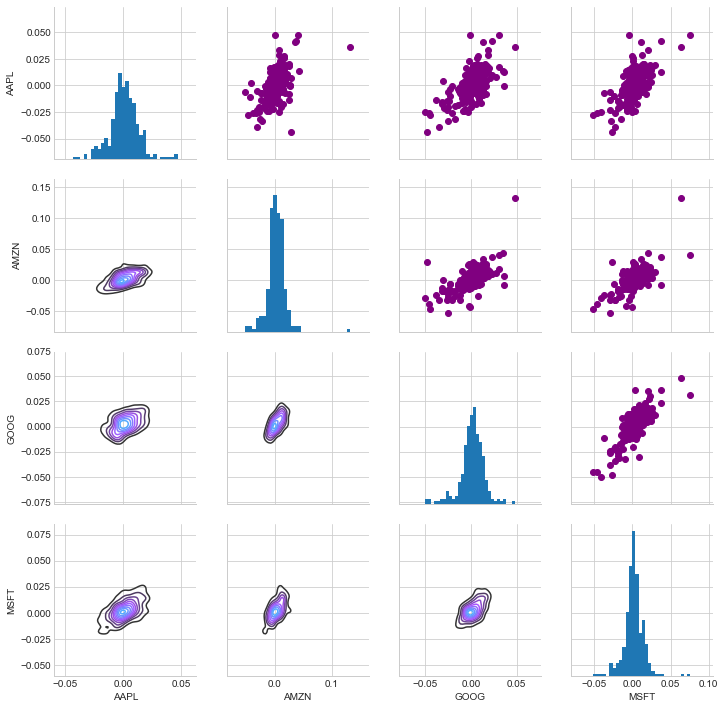

In [23]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


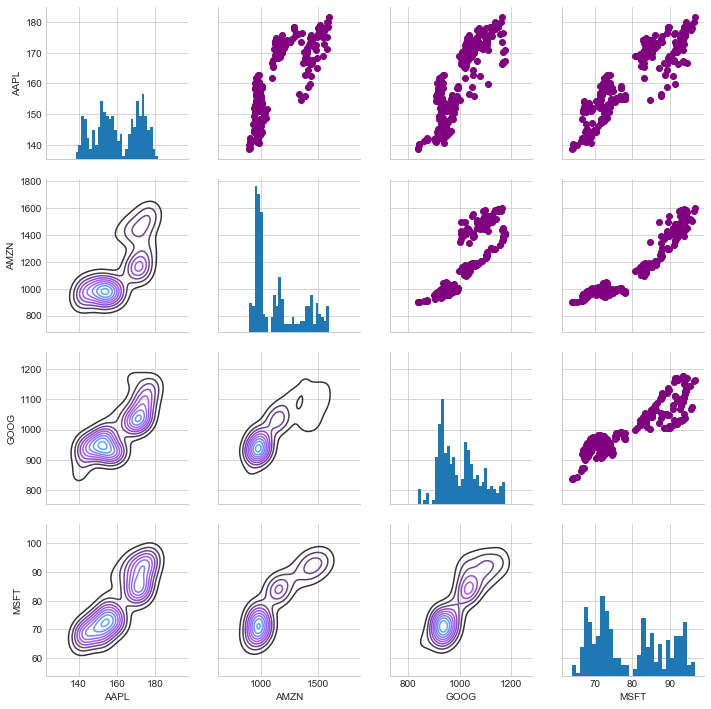

In [24]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

In [25]:
#sns.heatmap(tech_rets.dropna(), annot = True)

Risk Analysis

In [26]:
rets = tech_rets.dropna()
area = np.pi * 20

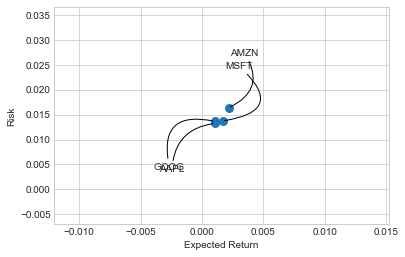

In [62]:
plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')

plt.ylabel('Risk')
rad = -0.3
n = 0
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    n = n + 1
    rad = (rad - 0.1)*(1.05)**n
    plt.annotate(label, xy = (x, y), xytext = (30*(-1)**(n), 50*(-1)**(n)),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = ' + str(rad)))

In [63]:
#sns.distplot(dr, kde = False, bins = 100, color = 'purple')
rets['AAPL'].quantile(0.05)

-0.021968554297450038

Value at Risk using the Monte Carlo Method

In [64]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [65]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
        
    return price

In [66]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-18,834.219971,838.929993,832.710022,836.820007,836.820007,836700
2017-04-19,839.789978,842.219971,836.289978,838.210022,838.210022,954200
2017-04-20,841.440002,845.200012,839.320007,841.650024,841.650024,959000
2017-04-21,842.880005,843.880005,840.599976,843.190002,843.190002,1323600
2017-04-24,851.200012,863.450012,849.859985,862.760010,862.760010,1372500


Text(0.5,1,'Monte Carlo Analysis')

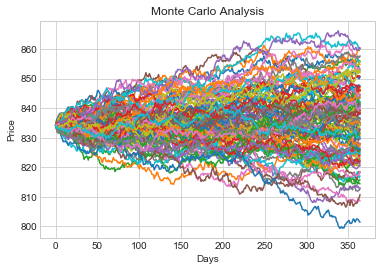

In [67]:
start_price = 834.219971

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [68]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

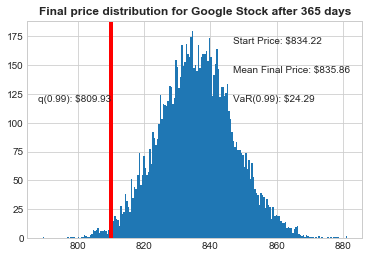

In [69]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s = 'Start Price: $%.2f' %start_price)

plt.figtext(0.6, 0.7, 'Mean Final Price: $%.2f' %simulations.mean())

plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' %(start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');